In [75]:
import pandas as pd
peakinf = []

In [ ]:
df = pd.read_csv('/Users/spenc/OneDrive/Documents/University_of_Utah/2019-2020/DataScience/COMP5360Project/project_files/csv_files/CLEANCDRdata.csv')

In [2]:
df = pd.read_csv(r'C:\Users\austi\Documents\GitHub\COMP5360Project\project_files\csv_files\CLEANCDRdata.csv')

In [ ]:
df = pd.read_csv('/Users/markomiholjcic/Documents/GitHub/COMP5360Project/project_files/csv_files/CLEANCDRdata.csv')

In [3]:
from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

df1 = list(df1.index.values)
df1.sort(key = lambda date: datetime.strptime(date, '%m/%d/%y'))

dfDate = pd.DataFrame(df1)
dfDate

,0
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20
...,...
63,3/25/20
64,3/26/20
65,3/27/20
66,3/28/20


In [4]:
China = df[df["Country/Region"] == "China"]  
China
dChina = China.groupby("Last Update")
dChina = dChina.sum()
dChina
dChina = list(dChina["Confirmed"].values)
dChina.sort()
dChina

ChinaCases = pd.DataFrame({"China": dChina})

ChinaCases
ChinaCases = pd.concat([dfDate,ChinaCases], axis=1, sort = False)
ChinaCases
ChinaCases = ChinaCases.rename(columns={0: "Date"})
ChinaCases

,Date,China
0,1/22/20,547
1,1/23/20,639
2,1/24/20,916
3,1/25/20,1399
4,1/26/20,2062
...,...,...
63,3/25/20,79574
64,3/26/20,79588
65,3/27/20,79749
66,3/28/20,79771


In [5]:
FMT = '%m/%d/%y'
days = ChinaCases['Date']
numday = []
from datetime import datetime 
for a in days:
    x = a
    y = (datetime.strptime(x, FMT) - datetime.strptime("1/21/20", FMT))
    z = y.days
    numday.append(z)
numday
#ChinaCases['Date'] = days.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("1/21/20", FMT)).days  )

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68]

In [6]:
import numpy as np
def LogisticModel(x,v,t,c):
    return c/(1+np.exp(-(x-t)/v))

In [7]:
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import math
Day = numday
Cases = list(ChinaCases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]

print(v)
print(t)
print(c)
infcases=ChinaCases['China'].iloc[int(t)]
peakinf.append(math.ceil(infcases))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))
sol

startdate = "01/21/2020"
enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))
pred_x

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]

plt.plot(Day+pred_x, Pred, label="Model Prediction")
plt.title("China Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

4.366066239569821
18.337962714756944
77697.25180790696
Day of Inflection: 2020-02-09 00:00:00
End of the Infection: 2020-04-03 00:00:00


In [8]:
import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

Day of Inflection: 2020-02-09 00:00:00


In [9]:
sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))
sol
startdate = "01/21/2020"
enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

End of the Infection: 2020-04-03 00:00:00


In [10]:
df = pd.read_csv(r'C:\Users\austi\Documents\GitHub\COMP5360Project\project_files\csv_files\CLEANCDRdata.csv')

from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

df1 = list(df1.index.values)
df1.sort(key = lambda date: datetime.strptime(date, '%m/%d/%y'))


SK = df[df["Country/Region"] == "South Korea"]  
SK
dSK = list(SK["Confirmed"].values)
dSK.sort()
length = len(dSK)

dfDate = pd.DataFrame(df1[0:length])
dfDate

SKCases = pd.DataFrame({"South Korea": dSK})

SKCases
SKCases = pd.concat([dfDate,SKCases], axis=1, sort = False)
SKCases
SKCases = SKCases.rename(columns={0: "Date"})
SKCases

FMT = '%m/%d/%y'
days = SKCases['Date']
numday = []
from datetime import datetime 
for a in days:
    x = a
    y = (datetime.strptime(x, FMT) - datetime.strptime("1/21/20", FMT))
    z = y.days
    numday.append(z)
numday

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61]

3.530193509969771
36.49968343383873
8940.552416140905
Day of Inflection: 2020-03-04 00:00:00
End of the Infection: 2020-03-31 00:00:00


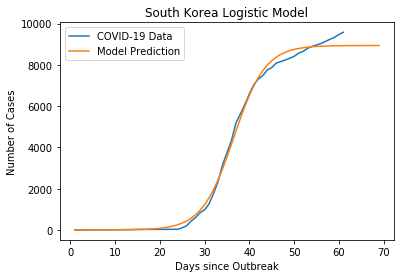

In [11]:
Day = numday
Cases = list(SKCases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]

print(v)
print(t)
print(c)
infcases=SKCases['South Korea'].iloc[int(t)]
peakinf.append(math.ceil(infcases))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))
startdate

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))
sol

startdate = "01/21/2020"
enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))
pred_x

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]

plt.plot(Day+pred_x, Pred, label="Model Prediction")

plt.title("South Korea Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

In [12]:
import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))
sol
startdate = "01/21/2020"
enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

Day of Inflection: 2020-02-27 00:00:00
End of the Infection: 2020-03-31 00:00:00


In [13]:

from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

df1 = list(df1.index.values)
df1.sort(key = lambda date: datetime.strptime(date, '%m/%d/%y'))

USA = df[df["Country/Region"] == "US"]  
USA
dUS = USA.groupby("Last Update")
dUS = dUS.sum()
dUS

dUS = list(dUS["Confirmed"].values)
dUS.sort()
dUS

length = len(dUS)
length

dfDate = pd.DataFrame(df1[0:length])
dfDate

USCases = pd.DataFrame({"US": dUS})
USCases
USCases = pd.concat([dfDate,USCases], axis=1, sort = False)
USCases
USCases = USCases.rename(columns={0: "Date"})
USCases

FMT = '%m/%d/%y'
days = USCases['Date']
numday = []
from datetime import datetime 
for a in days:
    x = a
    y = (datetime.strptime(x, FMT) - datetime.strptime("1/21/20", FMT))
    z = y.days
    numday.append(z)
numday

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52]

3.2122141579837087
51.135785139709625
247793.96937826506
Day of Inflection: 2020-03-28 00:00:00
End of the Infection: 2020-04-21 00:00:00


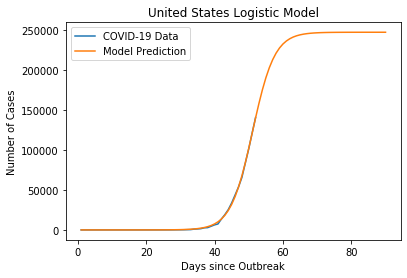

In [14]:
Day = numday
Cases = list(USCases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]

print(v)
print(t)
print(c)
infcases=USCases['US'].iloc[int(t)]
peakinf.append(math.ceil(infcases))
peakinf.append(math.ceil(c))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))
startdate

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))
sol

startdate = "01/21/2020"
enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))
pred_x

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]

plt.plot(Day+pred_x, Pred, label="Model Prediction")
plt.title("United States Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

In [15]:

from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

df1 = list(df1.index.values)
df1.sort(key = lambda date: datetime.strptime(date, '%m/%d/%y'))

ITA = df[df["Country/Region"] == "Italy"]  
dItaly = ITA.groupby("Last Update")
dItaly = dItaly.sum()
dItaly

dItaly = list(dItaly["Confirmed"].values)
dItaly.sort()
dItaly

length = len(dItaly)
length

dfDate = pd.DataFrame(df1[0:length])
dfDate

ITACases = pd.DataFrame({"Italy": dItaly})
ITACases
ITACases = pd.concat([dfDate,ITACases], axis=1, sort = False)
ITACases
ITACases = ITACases.rename(columns={0: "Date"})
ITACases

FMT = '%m/%d/%y'
days = ITACases['Date']
numday = []
from datetime import datetime 
for a in days:
    x = a
    y = (datetime.strptime(x, FMT) - datetime.strptime("1/21/20", FMT))
    z = y.days
    numday.append(z)
numday

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37]

4.25527797675734
29.45237464262807
110719.88032420875
Day of Inflection: 2020-03-21 00:00:00
End of the Infection: 2020-04-09 00:00:00


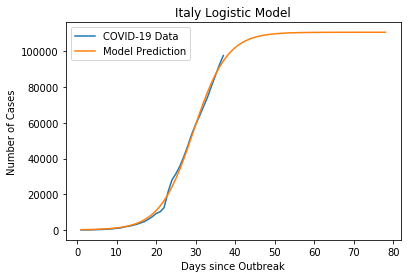

In [16]:
Day = numday
Cases = list(ITACases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]

print(v)
print(t)
print(c)
infcases=ITACases['Italy'].iloc[int(t)]
peakinf.append(math.ceil(infcases))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))
startdate

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))
sol

startdate = "01/21/2020"
enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))
pred_x

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]

plt.plot(Day+pred_x, Pred, label="Model Prediction")
plt.title("Italy Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

       Date  United Kingdom
0   1/22/20               2
1   1/23/20               2
2   1/24/20               3
3   1/25/20               3
4   1/26/20               8
5   1/27/20               9
6   1/28/20               9
7   1/29/20              13
8   1/30/20              15
9   1/31/20              20
10   2/1/20              23
11  2/02/20              36
12  2/03/20              40
13  2/04/20              51
14  2/05/20              85
15  2/06/20             115
16  2/07/20             163
17  2/08/20             206
18  2/09/20             273
19  2/10/20             321
20  2/11/20             382
21  2/12/20             459
22  2/13/20            1141
23  2/14/20            1550
24  2/15/20            1953
25  2/16/20            2635
26  2/17/20            2715
27  2/18/20            3998
28  2/19/20            5052
29  2/20/20            5741
30  2/21/20            6726
31  2/22/20            8164
32  2/23/20            9640
33  2/24/20           11812
34  2/25/20         

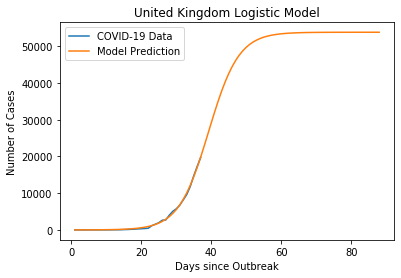

In [17]:

from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

df1 = list(df1.index.values)
df1.sort(key = lambda date: datetime.strptime(date, '%m/%d/%y'))

UK = df[df["Country/Region"] == "United Kingdom"]  
dUK = UK.groupby("Last Update")
dUK = dUK.sum()
dUK

dUK = list(dUK["Confirmed"].values)
dUK.sort()
dUK

length = len(dUK)
length

dfDate = pd.DataFrame(df1[0:length])
dfDate

UKCases = pd.DataFrame({"United Kingdom": dUK})
UKCases
UKCases = pd.concat([dfDate,UKCases], axis=1, sort = False)
UKCases
UKCases = UKCases.rename(columns={0: "Date"})
print(UKCases)

FMT = '%m/%d/%y'
days = UKCases['Date']
numday = []
from datetime import datetime 
for a in days:
    x = a
    y = (datetime.strptime(x, FMT) - datetime.strptime("1/21/20", FMT))
    z = y.days
    numday.append(z)
numday

Day = numday
Cases = list(UKCases.iloc[:,1])
plt.plot(Day, Cases, label="COVID-19 Data")

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]

print(v)
print(t)
print(c)
infcases=Cases[int(t)-5]
peakinf.append(math.ceil(infcases))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))
startdate

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))
sol


enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))
pred_x

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]

plt.plot(Day+pred_x, Pred, label="Model Prediction")
plt.title("United Kingdom Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

2.5105232374570092
17.582130780314014
817.1234614111252
Day of Inflection: 2020-03-27 00:00:00
End of the Infection: 2020-04-17 00:00:00


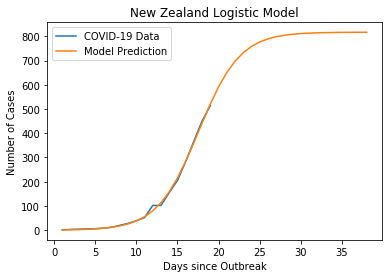

In [18]:

from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

df1 = list(df1.index.values)
df1.sort(key = lambda date: datetime.strptime(date, '%m/%d/%y'))

NZ = df[df["Country/Region"] == "New Zealand"]  
dNZ = NZ.groupby("Last Update")
dNZ = dNZ.sum()
dNZ

dNZ = list(dNZ["Confirmed"].values)
dNZ.sort()
dNZ

length = len(dNZ)
length

dfDate = pd.DataFrame(df1[0:length])
dfDate

NZCases = pd.DataFrame({"New Zealand": dNZ})
NZCases
NZCases = pd.concat([dfDate,NZCases], axis=1, sort = False)
NZCases
NZCases = NZCases.rename(columns={0: "Date"})
NZCases

FMT = '%m/%d/%y'
days = NZCases['Date']
numday = []
from datetime import datetime 
for a in days:
    x = a
    y = (datetime.strptime(x, FMT) - datetime.strptime("1/21/20", FMT))
    z = y.days
    numday.append(z)
numday

Day = numday
Cases = list(NZCases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]

print(v)
print(t)
print(c)


infcases=Cases[int(t)]
peakinf.append(math.ceil(infcases))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))
startdate

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))
sol


enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))
pred_x

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]

plt.plot(Day+pred_x, Pred, label="Model Prediction")
plt.title("New Zealand Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

6.761358918323754
32.098491284762446
50551.72082820748
Day of Inflection: 2020-03-23 00:00:00
End of the Infection: 2020-06-05 00:00:00


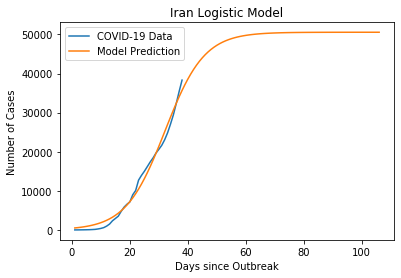

In [19]:

from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

df1 = list(df1.index.values)
df1.sort(key = lambda date: datetime.strptime(date, '%m/%d/%y'))

IR = df[df["Country/Region"] == "Iran"]  
dIR = IR.groupby("Last Update")
dIR = dIR.sum()
dIR

dIR = list(dIR["Confirmed"].values)
dIR.sort()
dIR

length = len(dIR)
length

dfDate = pd.DataFrame(df1[0:length])
dfDate

IRCases = pd.DataFrame({"Iran": dIR})
IRCases
IRCases = pd.concat([dfDate,IRCases], axis=1, sort = False)
IRCases
IRCases = IRCases.rename(columns={0: "Date"})
IRCases

FMT = '%m/%d/%y'
days = IRCases['Date']
numday = []
from datetime import datetime 
for a in days:
    x = a
    y = (datetime.strptime(x, FMT) - datetime.strptime("1/21/20", FMT))
    z = y.days
    numday.append(z)
numday

Day = numday
Cases = list(IRCases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]

print(v)
print(t)
print(c)
infcases=Cases[int(t)]
peakinf.append(math.ceil(infcases))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))
startdate

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))
sol

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))
pred_x

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]

plt.plot(Day+pred_x, Pred, label="Model Prediction")
plt.title("Iran Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

In [20]:

from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

df1 = list(df1.index.values)
df1.sort(key = lambda date: datetime.strptime(date, '%m/%d/%y'))

AU = df[df["Country/Region"] == "Australia"]  
dAU = AU.groupby("Last Update")
dAU = dAU.sum()
dAU

dAU = list(dAU["Confirmed"].values)
dAU.sort()
dAU

length = len(dAU)
length

dfDate = pd.DataFrame(df1[0:length])
dfDate

AUCases = pd.DataFrame({"Australia": dAU})
AUCases
AUCases = pd.concat([dfDate,AUCases], axis=1, sort = False)
AUCases
AUCases = AUCases.rename(columns={0: "Date"})
AUCases

,Date,Australia
0,1/22/20,0
1,1/23/20,2
2,1/24/20,3
3,1/25/20,4
4,1/26/20,4
5,1/27/20,4
6,1/28/20,5
7,1/29/20,5
8,1/30/20,5
9,1/31/20,5


3.574493249601515
44.329676269109584
5867.665304203044
Day of Inflection: 2020-03-26 00:00:00
End of the Infection: 2020-04-26 00:00:00


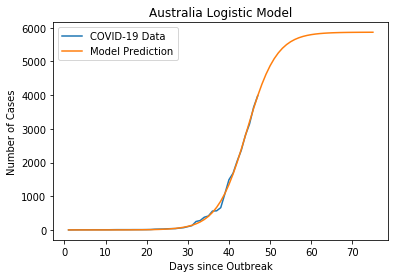

In [21]:

from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

df1 = list(df1.index.values)
df1.sort(key = lambda date: datetime.strptime(date, '%m/%d/%y'))

AU = df[df["Country/Region"] == "Australia"]  
dAU = AU.groupby("Last Update")
dAU = dAU.sum()
dAU

dAU = list(dAU["Confirmed"].values)
dAU.sort()
dAU

length = len(dAU)
length

dfDate = pd.DataFrame(df1[0:length])
dfDate

AUCases = pd.DataFrame({"Australia": dAU})
AUCases
AUCases = pd.concat([dfDate,AUCases], axis=1, sort = False)
AUCases
AUCases = AUCases.rename(columns={0: "Date"})
AUCases

FMT = '%m/%d/%y'
days = AUCases['Date']
numday = []
from datetime import datetime 
for a in days:
    x = a
    y = (datetime.strptime(x, FMT) - datetime.strptime("1/21/20", FMT))
    z = y.days
    numday.append(z)
numday

Day = numday
Cases = list(AUCases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]

print(v)
print(t)
print(c)
infcases=Cases[int(t)]
peakinf.append(math.ceil(infcases))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))
startdate

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))
sol

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))
pred_x

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]

plt.plot(Day+pred_x, Pred, label="Model Prediction")
plt.title("Australia Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

4.357601911010456
30.627899744708277
1834.9040787409422
Day of Inflection: 2020-03-27 00:00:00
End of the Infection: 2020-04-28 00:00:00


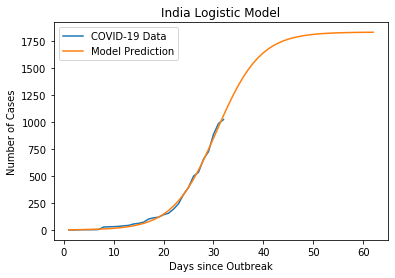

In [22]:

from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

df1 = list(df1.index.values)
df1.sort(key = lambda date: datetime.strptime(date, '%m/%d/%y'))

IN = df[df["Country/Region"] == "India"]  
dIN = IN.groupby("Last Update")
dIN = dIN.sum()
dIN

dIN = list(dIN["Confirmed"].values)
dIN.sort()
dIN
length = len(dIN)
length

dfDate = pd.DataFrame(df1[0:length])
dfDate

INCases = pd.DataFrame({"India": dIN})
INCases
INCases = pd.concat([dfDate,INCases], axis=1, sort = False)
INCases
INCases = INCases.rename(columns={0: "Date"})
INCases

FMT = '%m/%d/%y'
days = INCases['Date']
numday = []
from datetime import datetime 
for a in days:
    x = a
    y = (datetime.strptime(x, FMT) - datetime.strptime("1/21/20", FMT))
    z = y.days
    numday.append(z)
numday

Day = numday
Cases = list(INCases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]

print(v)
print(t)
print(c)
infcases=Cases[int(t)]
peakinf.append(math.ceil(infcases))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))
startdate

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))
sol

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))
pred_x

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]

plt.plot(Day+pred_x, Pred, label="Model Prediction")
plt.title("India Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

4.149056392928685
17.968451827498743
1164.6241720568976
Day of Inflection: 2020-03-25 00:00:00
End of the Infection: 2020-04-25 00:00:00


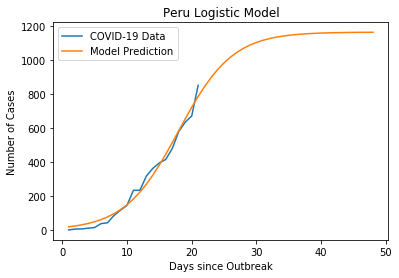

In [23]:

from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

df1 = list(df1.index.values)
df1.sort(key = lambda date: datetime.strptime(date, '%m/%d/%y'))

PR = df[df["Country/Region"] == "Peru"]  
dPR = PR.groupby("Last Update")
dPR = dPR.sum()
dPR

dPR = list(dPR["Confirmed"].values)
dPR.sort()
dPR
length = len(dPR)
length

dfDate = pd.DataFrame(df1[0:length])
dfDate

PRCases = pd.DataFrame({"Peru": dPR})
PRCases
PRCases = pd.concat([dfDate,PRCases], axis=1, sort = False)
PRCases
PRCases = PRCases.rename(columns={0: "Date"})
PRCases

FMT = '%m/%d/%y'
days = PRCases['Date']
numday = []
from datetime import datetime 
for a in days:
    x = a
    y = (datetime.strptime(x, FMT) - datetime.strptime("1/21/20", FMT))
    z = y.days
    numday.append(z)
numday

Day = numday
Cases = list(PRCases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]

print(v)
print(t)
print(c)
infcases=Cases[int(t)]
peakinf.append(math.ceil(infcases))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))
startdate

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))
sol

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))
pred_x

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]

plt.plot(Day+pred_x, Pred, label="Model Prediction")
plt.title("Peru Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

In [24]:
df = pd.read_csv(r'C:\Users\austi\Documents\GitHub\COMP5360Project\project_files\csv_files\usaCLEANCDRdata.csv')
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import math

In [25]:
state_inf = []

4.393808097091883
44.62039716125996
145240.2291664302
Day of Inflection: 2020-04-12 00:00:00
End of the Infection: 2020-06-09 00:00:00


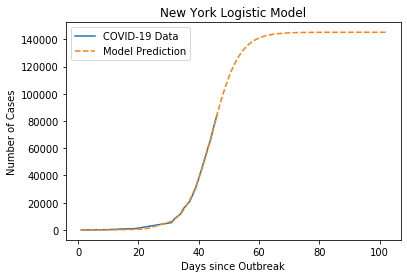

In [26]:
# NY, UT, CA, WA, IL, SD, ID, AZ, TX, NM, AL, WA-DC
from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

Dates = list(df1.index.values)
df
NY = df[df["Province/State"] == 'NY']
dNY = NY.groupby("Last Update")
dNY = dNY.sum()
dNY = list(dNY["Confirmed"].values)
dNY
length = len(dNY)
dfDate = pd.DataFrame(Dates[0:length])
dfDate

NYCases = pd.DataFrame({"New York": dNY})
NYCases
NYCases = pd.concat([dfDate,NYCases], axis=1, sort = False)
NYCases
NYCases = NYCases.rename(columns={0: "Date"})
NYCases

FMT = '%m/%d/%Y'
days = NYCases['Date']
numday = []

from datetime import datetime 
for a in days:
#    x = a
    y = (datetime.strptime(a, FMT) - datetime.strptime("1/21/2020", FMT))
    z = y.days
    numday.append(z)

Day = numday
Cases = list(NYCases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

import numpy as np
def LogisticModel(x,v,t,c):
    return c/(1+np.exp(-(x-t)/v))

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]

print(v)
print(t)
print(c)

infcases=Cases[int(t)-15]
state_inf.append(math.ceil(infcases))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))
startdate

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))
sol

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]
plt.plot(Day+pred_x, Pred, label="Model Prediction", linestyle="dashed")
plt.title("New York Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

9.395842199128563
34.63824259159205
1502.7777363344715
Day of Inflection: 2020-04-10 00:00:00
End of the Infection: 2020-06-19 00:00:00


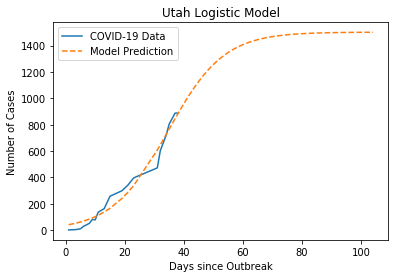

In [27]:
from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

Dates = list(df1.index.values)
UT = df[df["Province/State"] == 'UT']
dUT = UT.groupby("Last Update")
dUT = dUT.sum()
dUT = list(dUT["Confirmed"].values)

length = len(dUT)
dfDate = pd.DataFrame(Dates[0:length])

UTCases = pd.DataFrame({"Utah": dUT})
UTCases = pd.concat([dfDate,UTCases], axis=1, sort = False)
UTCases = UTCases.rename(columns={0: "Date"})

FMT = '%m/%d/%Y'
days = UTCases['Date']
numday = []

from datetime import datetime 
for a in days:
    y = (datetime.strptime(a, FMT) - datetime.strptime("1/21/2020", FMT))
    z = y.days
    numday.append(z)

Day = numday
Cases = list(UTCases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

import numpy as np
def LogisticModel(x,v,t,c):
    return c/(1+np.exp(-(x-t)/v))

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]
print(v)
print(t)
print(c)
infcases=Cases[int(t)-15]
state_inf.append(math.ceil(infcases))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]
plt.plot(Day+pred_x, Pred, label="Model Prediction", linestyle="dashed")
plt.title("Utah Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

5.28828816594493
66.98660146912043
33542.372791344584
Day of Inflection: 2020-04-19 00:00:00
End of the Infection: 2020-06-18 00:00:00


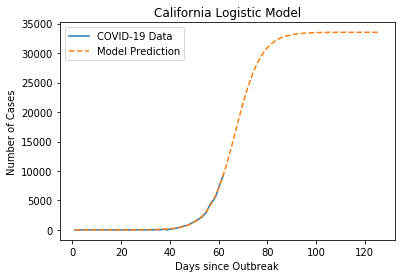

In [28]:
from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

Dates = list(df1.index.values)
CA = df[df["Province/State"] == 'CA']
dCA = CA.groupby("Last Update")
dCA = dCA.sum()
dCA = list(dCA["Confirmed"].values)

length = len(dCA)
dfDate = pd.DataFrame(Dates[0:length])

CACases = pd.DataFrame({"California": dCA})
CACases = pd.concat([dfDate,CACases], axis=1, sort = False)
CACases = CACases.rename(columns={0: "Date"})

FMT = '%m/%d/%Y'
days = CACases['Date']
numday = []

from datetime import datetime 
for a in days:
    y = (datetime.strptime(a, FMT) - datetime.strptime("1/21/2020", FMT))
    z = y.days
    numday.append(z)

Day = numday
Cases = list(CACases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

import numpy as np
def LogisticModel(x,v,t,c):
    return c/(1+np.exp(-(x-t)/v))

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]

print(v)
print(t)
print(c)
#infcases=Cases[-1]
#state_inf.append(math.ceil(infcases))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]
plt.plot(Day+pred_x, Pred, label="Model Prediction", linestyle="dashed")
plt.title("California Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

6.552351099198319
61.055448725304736
11462.325235631399
Day of Inflection: 2020-04-15 00:00:00
End of the Infection: 2020-06-21 00:00:00


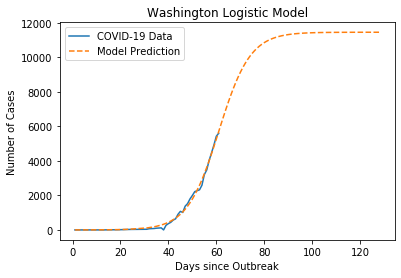

In [29]:
from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

Dates = list(df1.index.values)
WA = df[df["Province/State"] == 'WA']
dWA = WA.groupby("Last Update")
dWA = dWA.sum()
dWA = list(dWA["Confirmed"].values)

length = len(dWA)
dfDate = pd.DataFrame(Dates[0:length])

WACases = pd.DataFrame({"Washington": dWA})
WACases = pd.concat([dfDate,WACases], axis=1, sort = False)
WACases = WACases.rename(columns={0: "Date"})

FMT = '%m/%d/%Y'
days = WACases['Date']
numday = []

from datetime import datetime 
for a in days:
    y = (datetime.strptime(a, FMT) - datetime.strptime("1/21/2020", FMT))
    z = y.days
    numday.append(z)

Day = numday
Cases = list(WACases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

import numpy as np
def LogisticModel(x,v,t,c):
    return c/(1+np.exp(-(x-t)/v))

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]

print(v)
print(t)
print(c)
infcases=Cases[-1]
state_inf.append(math.ceil(infcases))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]
plt.plot(Day+pred_x, Pred, label="Model Prediction", linestyle="dashed")
plt.title("Washington Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

3.3764067067916343
50.31456291177037
9102.546924596878
Day of Inflection: 2020-04-11 00:00:00
End of the Infection: 2020-05-13 00:00:00


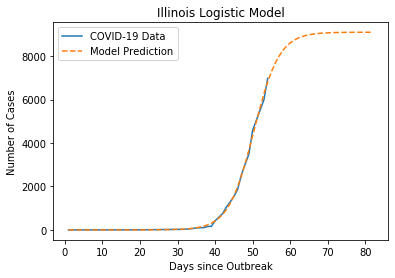

In [30]:
from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

Dates = list(df1.index.values)
IL = df[df["Province/State"] == 'IL']
dIL = IL.groupby("Last Update")
dIL = dIL.sum()
dIL = list(dIL["Confirmed"].values)

length = len(dIL)
dfDate = pd.DataFrame(Dates[0:length])

ILCases = pd.DataFrame({"Illinois": dIL})
ILCases = pd.concat([dfDate,ILCases], axis=1, sort = False)
ILCases = ILCases.rename(columns={0: "Date"})

FMT = '%m/%d/%Y'
days = ILCases['Date']
numday = []

from datetime import datetime 
for a in days:
    y = (datetime.strptime(a, FMT) - datetime.strptime("1/21/2020", FMT))
    z = y.days
    numday.append(z)

Day = numday
Cases = list(ILCases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

import numpy as np
def LogisticModel(x,v,t,c):
    return c/(1+np.exp(-(x-t)/v))

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]

print(v)
print(t)
print(c)
infcases=Cases[-1]
state_inf.append(math.ceil(infcases))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]
plt.plot(Day+pred_x, Pred, label="Model Prediction", linestyle="dashed")
plt.title("Illinois Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

4.640623919036485
14.36814985838064
128.00182750017441
Day of Inflection: 2020-03-26 00:00:00
End of the Infection: 2020-05-16 00:00:00


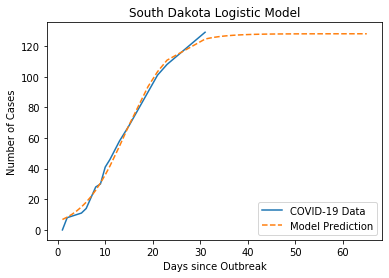

In [32]:
from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

Dates = list(df1.index.values)
SD = df[df["Province/State"] == 'SD']
dSD = SD.groupby("Last Update")
dSD = dSD.sum()
dSD = list(dSD["Confirmed"].values)

length = len(dSD)
dfDate = pd.DataFrame(Dates[0:length])

SDCases = pd.DataFrame({"South Dakota": dSD})
SDCases = pd.concat([dfDate,SDCases], axis=1, sort = False)
SDCases = SDCases.rename(columns={0: "Date"})

FMT = '%m/%d/%Y'
days = SDCases['Date']
numday = []

from datetime import datetime 
for a in days:
    y = (datetime.strptime(a, FMT) - datetime.strptime("1/21/2020", FMT))
    z = y.days
    numday.append(z)

Day = numday
Cases = list(SDCases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

import numpy as np
def LogisticModel(x,v,t,c):
    return c/(1+np.exp(-(x-t)/v))

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]

print(v)
print(t)
print(c)
infcases=Cases[int(t)]
state_inf.append(math.ceil(infcases))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]
plt.plot(Day+pred_x, Pred, label="Model Prediction", linestyle="dashed")
plt.title("South Dakota Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

6.631145412211128
25.131469513975645
647.0349983777043
Day of Inflection: 2020-04-04 00:00:00
End of the Infection: 2020-06-07 00:00:00


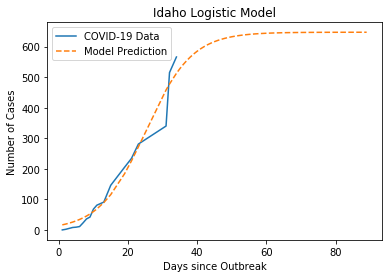

In [33]:
from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

Dates = list(df1.index.values)
ID = df[df["Province/State"] == 'ID']
dID = ID.groupby("Last Update")
dID = dID.sum()
dID = list(dID["Confirmed"].values)

length = len(dID)
dfDate = pd.DataFrame(Dates[0:length])

IDCases = pd.DataFrame({"Idaho": dID})
IDCases = pd.concat([dfDate,IDCases], axis=1, sort = False)
IDCases = IDCases.rename(columns={0: "Date"})

FMT = '%m/%d/%Y'
days = IDCases['Date']
numday = []

from datetime import datetime 
for a in days:
    y = (datetime.strptime(a, FMT) - datetime.strptime("1/21/2020", FMT))
    z = y.days
    numday.append(z)

Day = numday
Cases = list(IDCases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

import numpy as np
def LogisticModel(x,v,t,c):
    return c/(1+np.exp(-(x-t)/v))

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]
print(v)
print(t)
print(c)
infcases=Cases[-1]
state_inf.append(math.ceil(infcases))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]
plt.plot(Day+pred_x, Pred, label="Model Prediction", linestyle="dashed")
plt.title("Idaho Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

3.5216170534908593
46.208063719300924
2722.2356365507935
Day of Inflection: 2020-04-13 00:00:00
End of the Infection: 2020-05-15 00:00:00


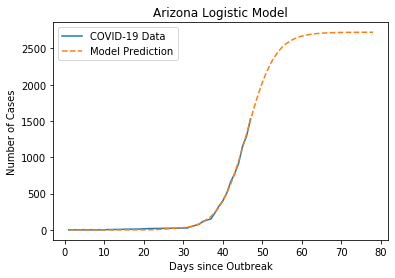

In [52]:
from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

Dates = list(df1.index.values)
AZ = df[df["Province/State"] == 'AZ']
dAZ = AZ.groupby("Last Update")
dAZ = dAZ.sum()
dAZ= list(dAZ["Confirmed"].values)

length = len(dAZ)
dfDate = pd.DataFrame(Dates[0:length])

WICases = pd.DataFrame({"Arizona": dAZ})
WICases = pd.concat([dfDate,WICases], axis=1, sort = False)
WICases = WICases.rename(columns={0: "Date"})

FMT = '%m/%d/%Y'
days = WICases['Date']
numday = []

from datetime import datetime 
for a in days:
    y = (datetime.strptime(a, FMT) - datetime.strptime("1/21/2020", FMT))
    z = y.days
    numday.append(z)

Day = numday
Cases = list(WICases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

import numpy as np
def LogisticModel(x,v,t,c):
    return c/(1+np.exp(-(x-t)/v))

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]
print(v)
print(t)
print(c)
infcases=Cases[-1]
state_inf.append(math.ceil(infcases))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]
plt.plot(Day+pred_x, Pred, label="Model Prediction", linestyle="dashed")
plt.title("Arizona Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

4.264483735505454
48.22785592972915
10174.04040853986
Day of Inflection: 2020-04-15 00:00:00
End of the Infection: 2020-06-06 00:00:00


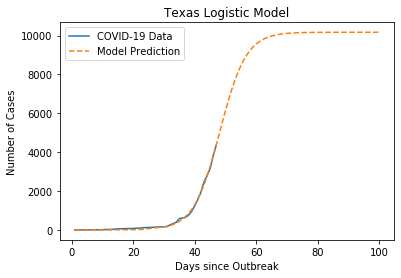

In [55]:
from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

Dates = list(df1.index.values)
AZ = df[df["Province/State"] == 'TX']
dAZ = AZ.groupby("Last Update")
dAZ = dAZ.sum()
dAZ= list(dAZ["Confirmed"].values)

length = len(dAZ)
dfDate = pd.DataFrame(Dates[0:length])

WICases = pd.DataFrame({"Arizona": dAZ})
WICases = pd.concat([dfDate,WICases], axis=1, sort = False)
WICases = WICases.rename(columns={0: "Date"})

FMT = '%m/%d/%Y'
days = WICases['Date']
numday = []

from datetime import datetime 
for a in days:
    y = (datetime.strptime(a, FMT) - datetime.strptime("1/21/2020", FMT))
    z = y.days
    numday.append(z)

Day = numday
Cases = list(WICases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

import numpy as np
def LogisticModel(x,v,t,c):
    return c/(1+np.exp(-(x-t)/v))

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]
print(v)
print(t)
print(c)
infcases=Cases[-1]
state_inf.append(math.ceil(infcases))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]
plt.plot(Day+pred_x, Pred, label="Model Prediction", linestyle="dashed")
plt.title("Texas Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

7.4436989604283985
23.678578946037792
370.43685033010206
Day of Inflection: 2020-04-01 00:00:00
End of the Infection: 2020-05-20 00:00:00


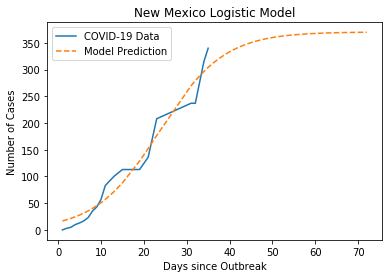

In [58]:
from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

Dates = list(df1.index.values)
AZ = df[df["Province/State"] == 'NM']
dAZ = AZ.groupby("Last Update")
dAZ = dAZ.sum()
dAZ= list(dAZ["Confirmed"].values)

length = len(dAZ)
dfDate = pd.DataFrame(Dates[0:length])

WICases = pd.DataFrame({"Arizona": dAZ})
WICases = pd.concat([dfDate,WICases], axis=1, sort = False)
WICases = WICases.rename(columns={0: "Date"})

FMT = '%m/%d/%Y'
days = WICases['Date']
numday = []

from datetime import datetime 
for a in days:
    y = (datetime.strptime(a, FMT) - datetime.strptime("1/21/2020", FMT))
    z = y.days
    numday.append(z)

Day = numday
Cases = list(WICases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

import numpy as np
def LogisticModel(x,v,t,c):
    return c/(1+np.exp(-(x-t)/v))

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]
print(v)
print(t)
print(c)
infcases=Cases[-1]
state_inf.append(math.ceil(infcases))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]
plt.plot(Day+pred_x, Pred, label="Model Prediction", linestyle="dashed")
plt.title("New Mexico Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

4.547577738078359
16.357565042983843
1005.3820332176821
Day of Inflection: 2020-03-26 00:00:00
End of the Infection: 2020-04-30 00:00:00


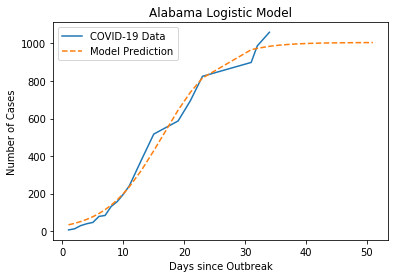

In [62]:
from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

Dates = list(df1.index.values)
AZ = df[df["Province/State"] == 'AL']
dAZ = AZ.groupby("Last Update")
dAZ = dAZ.sum()
dAZ= list(dAZ["Confirmed"].values)

length = len(dAZ)
dfDate = pd.DataFrame(Dates[0:length])

WICases = pd.DataFrame({"Arizona": dAZ})
WICases = pd.concat([dfDate,WICases], axis=1, sort = False)
WICases = WICases.rename(columns={0: "Date"})

FMT = '%m/%d/%Y'
days = WICases['Date']
numday = []

from datetime import datetime 
for a in days:
    y = (datetime.strptime(a, FMT) - datetime.strptime("1/21/2020", FMT))
    z = y.days
    numday.append(z)

Day = numday
Cases = list(WICases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

import numpy as np
def LogisticModel(x,v,t,c):
    return c/(1+np.exp(-(x-t)/v))

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]
print(v)
print(t)
print(c)
infcases=Cases[-1]
state_inf.append(math.ceil(infcases))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]
plt.plot(Day+pred_x, Pred, label="Model Prediction", linestyle="dashed")
plt.title("Alabama Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

7.3833479250872625
22.887883005103674
586.3319983570037
Day of Inflection: 2020-03-31 00:00:00
End of the Infection: 2020-05-25 00:00:00


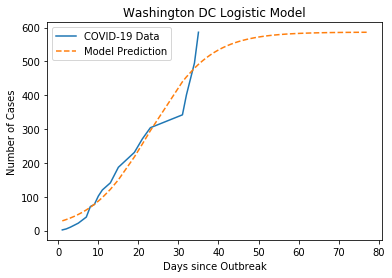

In [72]:
from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

Dates = list(df1.index.values)
AZ = df[df["Province/State"] == 'DC']
dAZ = AZ.groupby("Last Update")
dAZ = dAZ.sum()
dAZ= list(dAZ["Confirmed"].values)

length = len(dAZ)
dfDate = pd.DataFrame(Dates[0:length])

WICases = pd.DataFrame({"Arizona": dAZ})
WICases = pd.concat([dfDate,WICases], axis=1, sort = False)
WICases = WICases.rename(columns={0: "Date"})

FMT = '%m/%d/%Y'
days = WICases['Date']
numday = []

from datetime import datetime 
for a in days:
    y = (datetime.strptime(a, FMT) - datetime.strptime("1/21/2020", FMT))
    z = y.days
    numday.append(z)

Day = numday
Cases = list(WICases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

import numpy as np
def LogisticModel(x,v,t,c):
    return c/(1+np.exp(-(x-t)/v))

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,87,100000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]
print(v)
print(t)
print(c)
infcases=Cases[-1]
state_inf.append(math.ceil(infcases))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]
plt.plot(Day+pred_x, Pred, label="Model Prediction", linestyle="dashed")
plt.title("Washington DC Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

In [ ]:

print(state_inf)
peakinf

In [ ]:
data = pd.DataFrame({"PeakInfections": peakinf})
country = ["China", "South Korea", "United States", "Italy", "United Kingdom", "New Zealand", "Iran", "Australia", "India", "Peru"]
cont = pd.DataFrame({"Country": country})
data = pd.concat([cont,data], axis=1, sort = False)
data=data.sort_values(['Country'])
data=data.reset_index(drop=True)
data

In [ ]:
df3 = pd.read_csv(r'C:\Users\austi\Documents\GitHub\COMP5360Project\project_files\csv_files\CLEAN_WorldHealthIndex.csv')
df4 = pd.read_csv(r'C:\Users\austi\Documents\GitHub\COMP5360Project\project_files\csv_files\population_and_density_by_country.csv')

In [ ]:

countries = ['UnitedStatesofAmerica','Italy', 'China','UnitedKingdom','Iran,IslamicRepublicof',  'RepublicofKorea',   'Australia' , 'India','NewZealand', 'Peru']
countries2 = ['United States','Italy', 'China','United Kingdom','Iran',  'South Korea',   'Australia' , 'India','New Zealand', 'Peru']
df3 = df3.loc[df3['Member State'].isin(countries)]
df4 = df4.loc[df4['name'].isin(countries2)]
df3 = df3.sort_values(by=['Member State'])
df4 = df4.sort_values(by=['name'])
indexes = list(df3['Index'].values)
pop_density= list(df4["Density"].values)
population=list(df4['pop2019'].values)
index = pd.DataFrame({"WHOIndex": indexes})
pop_density = pd.DataFrame({"PopulationDensity": pop_density,'population':population})
data = pd.concat([data,index], axis=1, sort = False)
data = pd.concat([data,pop_density], axis=1, sort = False)
data

In [ ]:
correlation= data.corr()
plt.style.use('default')
Global_heatmap=plt.pcolor(correlation,vmin=-1,vmax=1,cmap=plt.cm.Reds)
plt.colorbar(Global_heatmap)
plt.xticks((range(4)),['Peak Infections','WHO Index', 'Population Dens.','population'])
plt.yticks((range(4)),['Peak Infections','WHO Index', 'Population Dens.','population'])           

In [76]:
import seaborn as sns
sns.set()
#sns.pairplot(data)#, hue="Language");

In [ ]:
import statsmodels.formula.api as sm
peak_infections_linear_regression = sm.ols(formula="PeakInfections~ WHOIndex+population", data=data).fit()
peak_infections_linear_regression.summary()

In [ ]:
df1 = pd.read_csv("/Users/markomiholjcic/Documents/GitHub/COMP5360Project/project_files/csv_files/Nation_HealthSurvey_Variables.csv")

df2 = pd.read_csv("/Users/markomiholjcic/Documents/GitHub/COMP5360Project/project_files/csv_files/CLEANHospitals.csv")

df3 = pd.read_csv("/Users/markomiholjcic/Documents/GitHub/COMP5360Project/project_files/csv_files/CLEANpopulation_and_population_density_USA.csv")

df4 = pd.read_csv(r"/Users/markomiholjcic/Documents/GitHub/COMP5360Project/project_files/csv_files/usaCLEANCDRData.csv")

In [182]:
df1 = pd.read_csv(r"C:\Users\austi\Documents\GitHub\COMP5360Project\project_files\csv_files\Nation_HealthSurvey_Variables.csv")

df2 = pd.read_csv(r"C:\Users\austi\Documents\GitHub\COMP5360Project\project_files\csv_files\CLEANHospitals.csv")

df3 = pd.read_csv(r"C:\Users\austi\Documents\GitHub\COMP5360Project\project_files\csv_files\CLEANpopulation_and_population_density_USA.csv")

df4 = pd.read_csv(r"C:\Users\austi\Documents\GitHub\COMP5360Project\project_files\csv_files\usaCLEANCDRData.csv")

In [183]:


states = ["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware",
          "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana",
          "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", 
          "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", 
          "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", 
          "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", 
          "West Virginia", "Wisconsin", "Wyoming", "District of Columbia"]
abb = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", "HI", "ID", "IL", "IN", "IA", "KS", "KY", 
       "LA", "ME", "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", "NM", "NY", "NC", "ND", "OH",
       "OK", "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY", "DC"]

for x in range(51):
    df4["Province/State"] = df4["Province/State"].replace(abb[x], states[x])
        
df4 = df4[df4["Last Update"] == "04/01/2020"]
groupData = df4.groupby("Province/State")
df4 = groupData.sum()

df1 = df1.rename(columns = {"State": "Province/State","# Primary Care Physicians":"Primary Care Physicians"})
df1 = df1.set_index('Province/State')

df2 = df2.rename(columns={"Location": "Province/State"})
df2 = df2.rename(columns ={"Total": "Total Beds"})
df2 = df2.set_index('Province/State')
df3 = df3.rename(columns = {"State": "Province/State"})
df3 = df3.set_index('Province/State')

df4 = df4[["Confirmed"]]
df4

df = pd.concat([df1,df2], axis=1, sort = False)
df = pd.concat([df, df3], axis = 1, sort = False)
df = pd.concat([df, df4], axis = 1, sort = False)
#df = df.drop('Deaths', axis=1)
df.columns = df.columns.str.replace(' ', '')
df.columns = df.columns.str.replace('%', 'Perc')
df.columns = df.columns.str.replace('-', '')
df.columns = df.columns.str.replace('.', '')
df.dtypes


Deaths                                    float64
YearsofPotentialLifeLostRate              float64
AverageNumberofPhysicallyUnhealthyDays    float64
AverageNumberofMentallyUnhealthyDays      float64
PercSmokers                                 int64
PercAdultswithObesity                       int64
FoodEnvironmentIndex                      float64
PercPhysicallyInactive                      int64
PercWithAccesstoExerciseOpportunities     float64
ChlamydiaRate                             float64
PercUninsured                             float64
PrimaryCarePhysicians                     float64
PrimaryCarePhysiciansRate                 float64
PreventableHospitalizationRate            float64
PercVaccinated                            float64
HighSchoolGraduationRate                  float64
PercSomeCollege                             int64
PercUnemployed                            float64
PercChildreninPoverty                     float64
IncomeRatio                               float64


Deaths                                    0.369574
YearsofPotentialLifeLostRate              0.243335
AverageNumberofPhysicallyUnhealthyDays    0.104648
AverageNumberofMentallyUnhealthyDays      0.068206
PercSmokers                               0.196954
PercAdultswithObesity                     0.220289
FoodEnvironmentIndex                      0.244039
PercPhysicallyInactive                    0.056462
PercWithAccesstoExerciseOpportunities     0.244635
ChlamydiaRate                             0.049133
PercUninsured                             0.108914
PrimaryCarePhysicians                     0.450651
PrimaryCarePhysiciansRate                 0.052014
PreventableHospitalizationRate            0.025732
PercVaccinated                            0.099647
HighSchoolGraduationRate                  0.052846
PercSomeCollege                           0.054130
PercUnemployed                            0.092034
PercChildreninPoverty                     0.045994
IncomeRatio                    

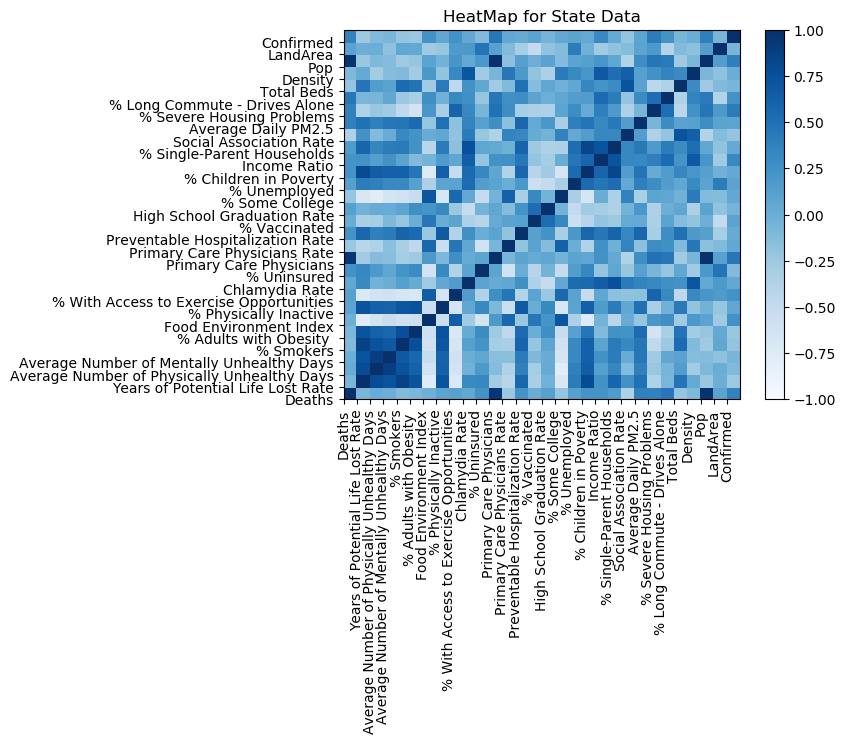

In [184]:
corr_m = df.corr()
plt.style.use('default')
heatmap = plt.pcolor(corr_m, vmin = -1, vmax = 1, cmap=plt.cm.Blues)
# plot the legend on the side
plt.colorbar(heatmap)

plt.xticks((np.arange(0, 30, step=1)), ['Deaths','Years of Potential Life Lost Rate', 
                                        'Average Number of Physically Unhealthy Days',
                                        'Average Number of Mentally Unhealthy Days',
                                       '% Smokers', '% Adults with Obesity ',
                                       'Food Environment Index','% Physically Inactive',
                                       '% With Access to Exercise Opportunities','Chlamydia Rate', 
                                        '% Uninsured', 'Primary Care Physicians', 
                                       'Primary Care Physicians Rate', 'Preventable Hospitalization Rate', 
                                       '% Vaccinated','High School Graduation Rate','% Some College',
                                       '% Unemployed', '% Children in Poverty', 'Income Ratio',
                                       '% Single-Parent Households', 'Social Association Rate',
                                        'Average Daily PM2.5', '% Severe Housing Problems',
                                        '% Long Commute - Drives Alone','Total Beds','Density','Pop',
                                        'LandArea', 'Confirmed'], rotation = 90)
plt.yticks((np.arange(0, 30, step=1)), ['Deaths','Years of Potential Life Lost Rate', 
                                        'Average Number of Physically Unhealthy Days',
                                        'Average Number of Mentally Unhealthy Days',
                                       '% Smokers', '% Adults with Obesity ',
                                       'Food Environment Index','% Physically Inactive',
                                       '% With Access to Exercise Opportunities','Chlamydia Rate', 
                                        '% Uninsured', 'Primary Care Physicians', 
                                       'Primary Care Physicians Rate', 'Preventable Hospitalization Rate', 
                                       '% Vaccinated','High School Graduation Rate','% Some College',
                                       '% Unemployed', '% Children in Poverty', 'Income Ratio',
                                       '% Single-Parent Households', 'Social Association Rate',
                                        'Average Daily PM2.5', '% Severe Housing Problems',
                                        '% Long Commute - Drives Alone','Total Beds','Density','Pop',
                                        'LandArea', 'Confirmed'], rotation = 0)

plt.title("HeatMap for State Data")
casescorr=corr_m['Confirmed']
casescorr.abs()

In [187]:
import statsmodels.formula.api as sm
peak_infections_linear_regression = sm.ols(formula="Confirmed~ PrimaryCarePhysicians + Deaths + Pop + PercSevereHousingProblems + IncomeRatio + PercLongCommuteDrivesAlone + PercWithAccesstoExerciseOpportunities + PercAdultswithObesity + FoodEnvironmentIndex + PercSmokers + YearsofPotentialLifeLostRate + PercUninsured + SocialAssociationRate + LandArea + TotalBeds + PercUnemployed + PercVaccinated + AverageNumberofMentallyUnhealthyDays + AverageNumberofPhysicallyUnhealthyDays + AverageDailyPM25 + PercSomeCollege + PercChildreninPoverty + PercSingleParentHouseholds + ChlamydiaRate + PreventableHospitalizationRate", data=df).fit()
peak_infections_linear_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Confirmed   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     1.950
Date:                Wed, 22 Apr 2020   Prob (F-statistic):             0.0507
Time:                        05:03:34   Log-Likelihood:                -523.32
No. Observations:                  51   AIC:                             1099.
Df Residuals:                      25   BIC:                             1149.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                              -6.451e+04   1.29e+05     -0.502      0.620   -3.29e+05       2e+05
PrimaryCarePhysicians                      5.2435      2.726      1.924      0.066      -0.370      10.857
Deaths                                     0.2460      0.190      1.296      0.207      -0.145       0.637
Pop                                       -0.0066      0.003     -2.202      0.037      -0.013      -0.000
PercSevereHousingProblems               1105.0473   1142.478      0.967      0.343   -1247.930    3458.024
IncomeRatio                             1078.0344   7857.546      0.137      0.892   -1.51e+04    1.73e+04
PercLongCommuteDrivesAlone               305.6362    502.587      0.608      0.549    -729.461    1340.733
PercWithAccesstoExerciseOpportunities   -205.1096    436.558     -0.470      0.643   -1104.217     693.998
PercAdultswithObesity                    328.8815   1118.249      0.294      0.771   -1974.196    2631.959
FoodEnvironmentIndex                    6768.1464   3466.373      1.953      0.062    -370.983    1.39e+04
PercSmokers                              677.2038   1424.823      0.475      0.639   -2257.274    3611.682
YearsofPotentialLifeLostRate              -6.4978      4.805     -1.352      0.188     -16.394       3.398
PercUninsured                            350.6373    859.226      0.408      0.687   -1418.971    2120.246
SocialAssociationRate                  -2084.7476   1290.239     -1.616      0.119   -4742.045     572.550
LandArea                                   0.0479      0.052      0.930      0.361      -0.058       0.154
TotalBeds                               1.165e+04   5710.633      2.039      0.052    -116.100    2.34e+04
PercUnemployed                            92.7692   3788.016      0.024      0.981   -7708.797    7894.335
PercVaccinated                           859.5251    611.215      1.406      0.172    -399.296    2118.346
AverageNumberofMentallyUnhealthyDays    1.181e+04   8025.387      1.472      0.153   -4714.320    2.83e+04
AverageNumberofPhysicallyUnhealthyDays -1.627e+04   1.01e+04     -1.605      0.121   -3.71e+04    4609.610
AverageDailyPM25                        -720.5348   1919.161     -0.375      0.710   -4673.121    3232.051
PercSomeCollege                         -251.2457   1123.787     -0.224      0.825   -2565.728    2063.237
PercChildreninPoverty                   4306.1191   1893.325      2.274      0.032     406.744    8205.494
PercSingleParentHouseholds             -2046.9093   1209.189     -1.693      0.103   -4537.281     443.462
ChlamydiaRate                             21.0564     35.426      0.594      0.558     -51.905      94.018
PreventableHospitalizationRate            -1.7939      3.610     -0.497      0.624     

In [193]:
import statsmodels.formula.api as sm
peak_infections_linear_regression = sm.ols(formula="Confirmed~  + Deaths + PrimaryCarePhysicians + PercSevereHousingProblems + FoodEnvironmentIndex + PercSmokers + AverageNumberofMentallyUnhealthyDays + TotalBeds + PercUninsured", data=df).fit()
peak_infections_linear_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Confirmed   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     2.635
Date:                Wed, 22 Apr 2020   Prob (F-statistic):             0.0195
Time:                        05:06:29   Log-Likelihood:                -540.54
No. Observations:                  51   AIC:                             1099.
Df Residuals:                      42   BIC:                             1116.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                            -6.748e+04   3.52e+04     -1.915      0.062   -1.39e+05    3640.228
Deaths                                  -0.0306      0.097     -0.315      0.754      -0.226       0.165
PrimaryCarePhysicians                    1.0623      1.370      0.776      0.442      -1.702       3.827
PercSevereHousingProblems             1126.2789    572.610      1.967      0.056     -29.294    2281.852
FoodEnvironmentIndex                  2568.7256   2043.810      1.257      0.216   -1555.850    6693.301
PercSmokers                           -347.8999    900.523     -0.386      0.701   -2165.229    1469.429
AverageNumberofMentallyUnhealthyDays  5591.7878   4396.165      1.272      0.210   -3280.033    1.45e+04
TotalBeds                             4473.9653   2867.172      1.560      0.126   -1312.221    1.03e+04
PercUninsured                          278.3667    645.053      0.432      0.668   -1023.404    1580.137
==============================================================================
Omnibus:                       78.875   Durbin-Watson:                   1.821
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1407.063
Skew:                           3.952   Prob(JB):                    2.88e-306
Kurtosis:                      27.488   Cond. No.                     2.49e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#import numpy as np
#def GompertzModel(x,a,b,c):
#    return a*(np.exp(b*(np.exp(c*x))))
#
#from scipy.optimize import curve_fit
#from scipy.optimize import fsolve
#import matplotlib.pyplot as plt
#
#Day = numday
#Cases = list(ChinaCases.iloc[:,1])
#fit2 = curve_fit(GompertzModel,Day,Cases, p0=[77000, -20, 2],)
#
#params = fit2[0]
#
#a = params[0]
#b = params[1]
#c = params[2]
#
#print(a)
#print(b)
#print(c)
##Pred = LogisticModel(Day, *params)
##plt.plot(Day, Pred)
##plt.plot(Day, Cases)